In [17]:
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import layers
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [9]:
train_datagen = \
ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory(

'/content/drive/MyDrive/covid_data',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 453 images belonging to 1 classes.


In [10]:
val_generator = train_datagen.flow_from_directory(

'/content/drive/MyDrive/covid_data',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
     subset='validation')

Found 113 images belonging to 1 classes.


In [14]:
 model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 211s 14s/step - accuracy: 0.8638 - loss: 0.1774 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [18]:
model.save('/content/drive/MyDrive/brain_tumor/data.h5')

In [19]:
 from tensorflow.keras.models import load_model
 from tensorflow.keras.preprocessing import image
 import matplotlib.pyplot as plt #visualisation
 import numpy as np
 model =load_model('/content/drive/MyDrive/brain_tumor/data.h5')
 print("Model Loaded")

Model Loaded


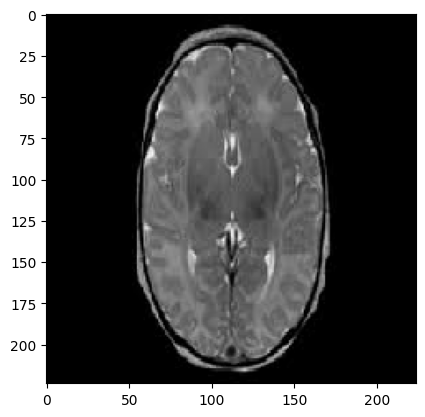

In [20]:
 test_image_path="/content/drive/MyDrive/covid_data/archive (4)/no/12 no.jpg"
 img=image.load_img(test_image_path,target_size=(224,224))
 plt.imshow(img)
 plt.axis()
 plt.show()

In [21]:
 img_array=image.img_to_array(img)
 img_array=np.expand_dims(img_array,axis=0)
 img_array /= 255

In [22]:
 prediction =model.predict(img_array)
 print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
[[0.]]


In [23]:
if prediction >= 0.5:
  print("Tumor Detected")
else:
  print("No Tumor Detected")

No Tumor Detected
